<a href="https://colab.research.google.com/github/Nam-SW/GOE/blob/master/GOE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOE 모델 만들거시다

데이터 불러오기

In [57]:
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np
import time # 인풋데이터를 섞기 위한 랜덤시드를 위해!

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


데이터 로드

In [0]:
class m1_data:
    def __init__(self): # 검증셋 만들어야함
        x_train = np.load('/content/gdrive/My Drive/GOE/m1_Xtrain.npy')
        y_train = np.load('/content/gdrive/My Drive/GOE/m1_Ytrain.npy')
        x_test = np.load('/content/gdrive/My Drive/GOE/m1_Xtest.npy')
        y_test = np.load('/content/gdrive/My Drive/GOE/m1_Ytest.npy')

        np.random.seed(int(time.time()))

        # 배열 섞기
        permutation = np.random.permutation(y_train.shape[0])
        x_train = x_train[permutation, :]
        y_train = y_train[permutation]
        # print(x)
        # print(y)

        # 배열 섞고싶다
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.x_shape = x_test.shape[1]
        self.y_shape = y_test.shape[1]

학습 그래프 함수 정의

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history, yname, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    if yname == 'acc':
        plt.plot(history['acc']) # 선 그리기
        plt.plot(history['val_acc'])
        plt.ylabel('Accuracy') # y축 이름 표시
    else:
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.ylabel('Loss') # y축 이름 표시
        
    if title is not None:
        plt.title(title) # 그래프 제목 표시
    
    plt.xlabel('Epoch') # x축 이름 표시
    plt.legend(['Training', 'Verification'], loc=0) # 각 라인의 표식 표시
    plt.show()

모델 정의

In [0]:
import keras
from keras import layers
from keras.models import Sequential

def build_model(input_size, output_size):
    m = Sequential()
    m.add(layers.Dense(16, activation='relu', input_shape=(input_size,)))
    m.add(layers.Dense(64, activation='relu'))
    m.add(layers.Dense(128, activation='relu'))
    m.add(layers.Dropout(0.2))
    m.add(layers.Dense(256, activation='relu'))


    m.add(layers.Dense(output_size, activation='sigmoid'))

    # m.compile(loss='binary_crossentropy', optimizer='adam')
    m.compile(loss='mse', optimizer='adam')

    return m

실행

In [73]:
data = m1_data()
model = build_model(data.x_shape, data.y_shape)
model.summary()
history = model.fit(data.x_train, data.y_train*8, epochs=100, batch_size=5, validation_split=0.2, verbose=2)

performace_test = model.evaluate(data.x_test, data.y_test*8, batch_size=5)
print('\nTest Loss -> {:.2f}'.format(performace_test))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 16)                80        
_________________________________________________________________
dense_105 (Dense)            (None, 64)                1088      
_________________________________________________________________
dense_106 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_108 (Dense)            (None, 96)                24672     
Total params: 67,184
Trainable params: 67,184
Non-trainable params: 0
_________________________________________________

그래프 그리기

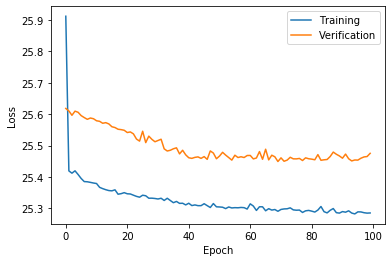

In [74]:
plot_graph(history, 'loss')

학습된 모델로 예측

In [75]:
# d = np.array([[8, 5, 26.3, 3], [1, 1, -5.0, 1]])
# model.predict(d[:1])[0]

for i in range(30):
    print(list(data.x_train[i]))
    print(list(map(lambda x:1 if x >= 0.5 else 0, model.predict(data.x_test[i:i+1])[0])))

[2.0, 6.0, -1.1, 1.0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3.0, 4.0, 2.1, 5.0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[7.0, 7.0, 29.5, 3.0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[6.0, 3.0, 22.4, 2.0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

모델 저장

In [0]:
model.save('/content/gdrive/My Drive/GOE/model1.h5')